<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Soft_Computing_Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from deap import base,creator,tools,algorithms

Fan Speed :  55.95238095238095


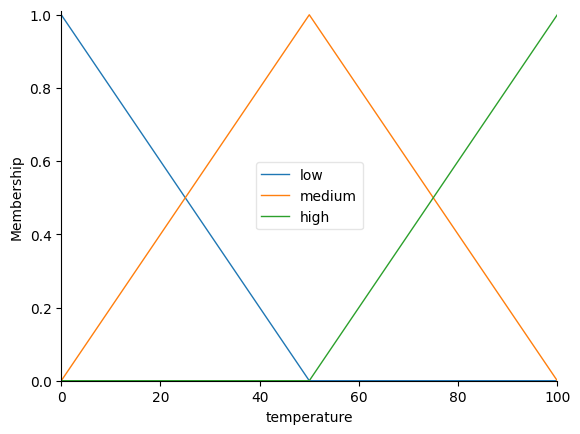

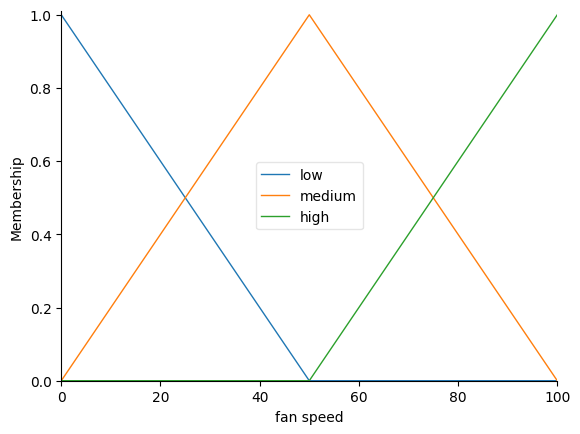

In [12]:
#Input of fuzzy logic
temperature = ctrl.Antecedent(np.arange(0,101,1),'temperature')
#Output of fuzzy logic
fan_speed = ctrl.Consequent(np.arange(0,101,1),'fan speed')

#fuzz.trimf stands for triangular membership function
#[0 , 0, 50] - specifies the parameters of the triangular function
#This means that the membership value of 'low' is 1 (fully belongs)
#when the temperature is 0 and decreases linearly to 0 when the temperature reaches 50.
temperature['low'] = fuzz.trimf(temperature.universe, [0 ,0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0 ,50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50 ,100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

#Defines Rules
#These are the fuzzy rules that relate temperture to the fan speed
rule1 = ctrl.Rule(temperature['low'],fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'],fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'],fan_speed['high'])

#Create the Control System
#This integrates the defined rules into a control system
fan_speed_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
fan_speed_stimulator = ctrl.ControlSystemSimulation(fan_speed_ctrl)

#Stimulate Fuzzy System
fan_speed_stimulator.input['temperature'] = 75
fan_speed_stimulator.compute()
print("Fan Speed : ", fan_speed_stimulator.output['fan speed'])

temperature.view()
fan_speed.view()


Fan Speed: 74.21052631578951


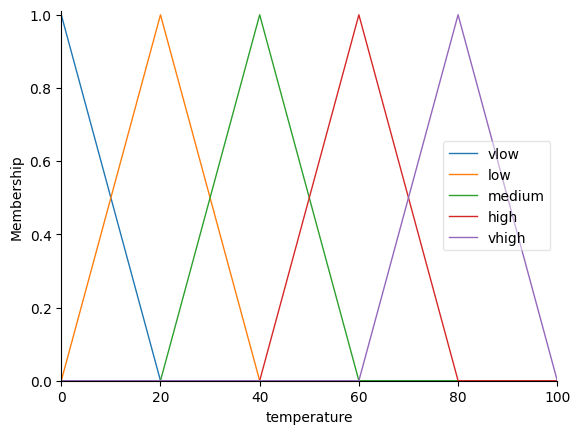

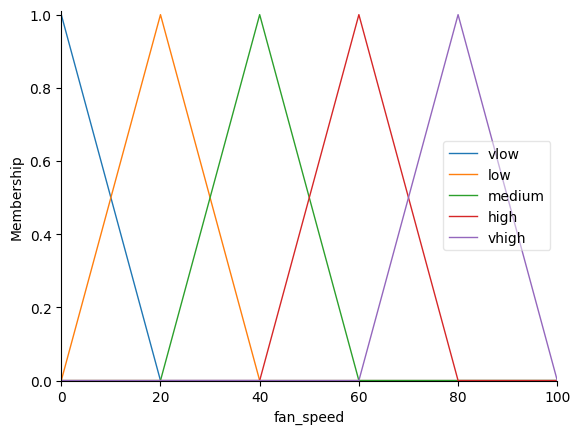

In [18]:
# Define Antecedents and Consequents
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define Membership Functions
# Experiment with different types and numbers of membership functions
# Adjust the parameters and types according to the scenario
temperature['vlow'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['low'] = fuzz.trimf(temperature.universe, [0, 20, 40])
temperature['medium'] = fuzz.trimf(temperature.universe, [20, 40, 60])
temperature['high'] = fuzz.trimf(temperature.universe, [40, 60, 80])
temperature['vhigh'] = fuzz.trimf(temperature.universe, [60, 80, 100])

fan_speed['vlow'] = fuzz.trimf(fan_speed.universe, [0, 0, 20])
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 20, 40])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [20, 40, 60])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [40, 60, 80])
fan_speed['vhigh'] = fuzz.trimf(fan_speed.universe, [60, 80, 100])

# Define Rules
# Define rules based on the new membership functions
# Experiment with different combinations and numbers of rules
rule1 = ctrl.Rule(temperature['vlow'], fan_speed['vlow'])
rule2 = ctrl.Rule(temperature['low'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['medium'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['high'], fan_speed['high'])
rule5 = ctrl.Rule(temperature['vhigh'], fan_speed['vhigh'])

# Create Control System
fan_speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
fan_speed_simulator = ctrl.ControlSystemSimulation(fan_speed_ctrl)

# Simulate Fuzzy System
# Adjust input temperature value according to the scenario
fan_speed_simulator.input['temperature'] = 75
fan_speed_simulator.compute()
print("Fan Speed:", fan_speed_simulator.output['fan_speed'])

# Plot Membership Functions
# Plot membership functions for both 'temperature' and 'fan_speed' variables
temperature.view()
fan_speed.view()

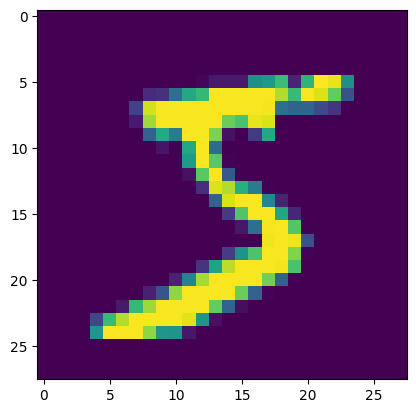

In [40]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])

In [41]:
# Preprocess data
#28 * 28 = 784
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Build Model
num_hidden_layers = 3
num_hidden_nodes = [64, 32, 16]

layers = []
for i in range(num_hidden_layers):
  if len(layers) == 0:
    layer = Dense(num_hidden_nodes[i], activation='relu', input_shape=(784,))
  else:
    layer = Dense(num_hidden_nodes[i], activation='relu')

  layers += [layer]

layers += [Dense(10, activation='softmax')] # output layer
model = Sequential(layers)

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3179 - accuracy: 0.9054 - val_loss: 0.1644 - val_accuracy: 0.9534
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1409 - accuracy: 0.9585 - val_loss: 0.1294 - val_accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1018 - accuracy: 0.9692 - val_loss: 0.1113 - val_accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0826 - accuracy: 0.9745 - val_loss: 0.1088 - val_accuracy: 0.9683
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0688 - accuracy: 0.9790 - val_loss: 0.1011 - val_accuracy: 0.9694


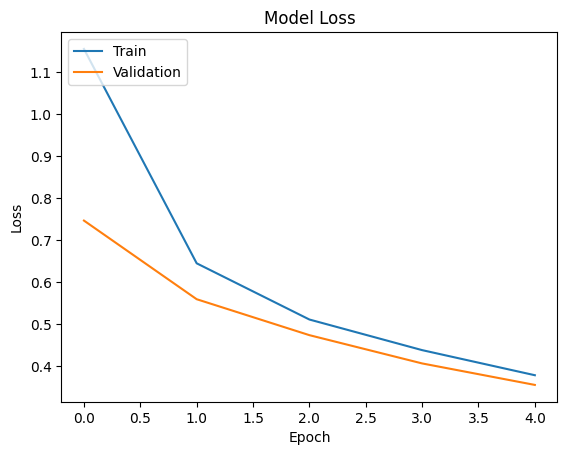

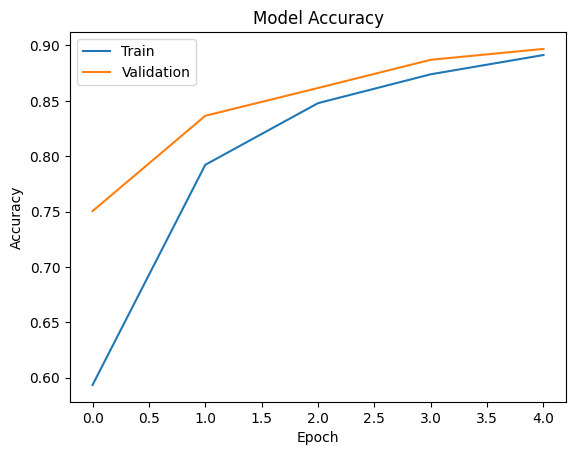

In [34]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Plot training & validation accuracy value
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [43]:
# Define a list of configurations to experiment with
configurations = [
    {'hidden_layers': 1, 'hidden_nodes': [64]},
    {'hidden_layers': 2, 'hidden_nodes': [64, 32]},
    {'hidden_layers': 3, 'hidden_nodes': [64, 32, 16]},
    # Add more configurations as needed
]

results = []

for config in configurations:
    # Build Model
    layers = []
    for i in range(config['hidden_layers']):
        if len(layers) == 0:
            layer = Dense(config['hidden_nodes'][i], activation='relu', input_shape=(784,))
        else:
            layer = Dense(config['hidden_nodes'][i], activation='relu')
        layers += [layer]

    layers += [Dense(10, activation='softmax')] # output layer
    model = Sequential(layers)

    # Compile Model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print("\nConfiguration : ","Hidden Layers : ",config["hidden_layers"],", Hidden Nodes : ",config["hidden_nodes"])

    # Train Model
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

    # Evaluate and store results
    training_time = sum(history.epoch)  # Sum of epochs gives an estimate of training time
    accuracy = history.history['val_accuracy'][-1]  # Validation accuracy of the last epoch
    results.append({'config': config, 'accuracy': accuracy, 'training_time': training_time})

# Print results
for result in results:
    print("Configuration:", result['config'])
    print("Validation Accuracy:", result['accuracy'])
    print("Training Time (Epochs):", result['training_time'])
    print()


Configuration :  Hidden Layers :  1 , Hidden Nodes :  [64]
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3025 - accuracy: 0.9147 - val_loss: 0.1665 - val_accuracy: 0.9486
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1442 - accuracy: 0.9580 - val_loss: 0.1238 - val_accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1048 - accuracy: 0.9686 - val_loss: 0.0982 - val_accuracy: 0.9698
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0832 - accuracy: 0.9747 - val_loss: 0.0964 - val_accuracy: 0.9702
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0887 - val_accuracy: 0.9728

Configuration :  Hidden Layers :  2 , Hidden Nodes :  [64, 32]
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2932 - accuracy: 0.9151 - val_loss: 0.1655 - val_accuracy: 0.9511
Epoch 2/5
1875/187